## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [27]:
# Following Jason Browlee's tutorial on Keras Regression

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [28]:
# load datset
df = pd.read_csv('housing.csv', delim_whitespace=True, header=None)
dataset = df.values
# split into input(X) and output(Y) variables
X = dataset[:, 0:13]
Y = dataset[:, 13]


In [29]:
"""
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
"""

'\nfrom keras.datasets import boston_housing\n\n(X_train, y_train), (X_test, y_test) = boston_housing.load_data()\n'

In [30]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [31]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [35]:
# We can use a scikit learn workflow with Keras by using a Keras wrapper object that comes with scikit-learn

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
#evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [36]:
# the final step is to evaluate the baseline model with 10-fold cross validation
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline model:\n")
print("Mean of MSE: {:.2f} Standard Deviation of : {:.2f}".format(results.mean(), results.std()))

Baseline model:

Mean of MSE: -32.52 Standard Deviation of : 23.28


In [40]:
# Let's standardize the data with mean zero and standard deviation 1

np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Mean of MSE: {:.2f} Standard Deviation of : {:.2f}".format(results.mean(), results.std()))

Mean of MSE: -29.67 Standard Deviation of : 27.91


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [50]:
##### Your Code Here #####
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential

batch_size= 128
num_classes = 10
epochs = 20

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten the images
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [51]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2)) ## Added dropout
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 16)                12560     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_105 (Dense)            (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(X_train, y_train, epochs=epochs, validation_split=.1)
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 8s 143us/step - loss: 1.0080 - acc: 0.6210 - val_loss: 0.5540 - val_acc: 0.7978
Epoch 2/20
54000/54000 [==============================] - 5s 102us/step - loss: 0.7450 - acc: 0.7147 - val_loss: 0.5212 - val_acc: 0.8062
Epoch 3/20
54000/54000 [==============================] - 6s 114us/step - loss: 0.6816 - acc: 0.7456 - val_loss: 0.4906 - val_acc: 0.8188
Epoch 4/20
54000/54000 [==============================] - 6s 103us/step - loss: 0.6509 - acc: 0.7564 - val_loss: 0.5193 - val_acc: 0.8203
Epoch 5/20
54000/54000 [==============================] - 6s 104us/step - loss: 0.6394 - acc: 0.7599 - val_loss: 0.4647 - val_acc: 0.8398
Epoch 6/20
54000/54000 [==============================] - 6s 105us/step - loss: 0.6258 - acc: 0.7685 - val_loss: 0.4628 - val_acc: 0.8353
Epoch 7/20
54000/54000 [==============================] - 6s 103us/step - loss: 0.6132 - acc: 0.7733 - val_loss: 0.4577 - v

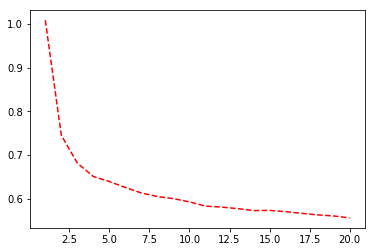

In [54]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
#test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) +1)

plt.plot(epoch_count, training_loss, 'r--')
#plt.plot(epoch_count, test_loss, 'b-')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.